# Data Loading and Preprocessing Tests

This notebook tests the data loading functionality for ASC files and basic preprocessing operations.

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add parent directory to path to import modules
sys.path.insert(0, os.path.abspath('..'))

print("Imports successful!")

Imports successful!


## 1. Test ASC File Loading

Load and inspect an ASC file from the test data directory.

In [4]:
# Import the loading function from Tests
sys.path.insert(0, os.path.join(os.path.abspath('..'), 'Tests'))
from Normal_data_to_fft import load_and_process_asc_file, extract_pump_channels

# Path to test ASC file
test_file = '../Tests/Data/V24-2025__0021.ASC'

# Check if file exists
if os.path.exists(test_file):
    print(f"Loading file: {test_file}")
    df = load_and_process_asc_file(test_file)
    print(f"\nLoaded DataFrame shape: {df.shape}")
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nFirst few rows:")
    display(df.head())
else:
    print(f"Test file not found: {test_file}")
    print("Please ensure you have test data in industrial_data_system/Tests/Data/")

Loading file: ../Tests/Data/V24-2025__0021.ASC


2026-01-08 08:17:35,868 - INFO - Successfully loaded ASC file. Shape: (22800, 11)
2026-01-08 08:17:35,870 - INFO - Columns: ['Messzeit[s]', 'Pressure [bar]', 'Flow [L/min]', 'Leak [L/min]', 'Speed [rpm]', 'Torque [Nm]', 'LS [bar]', 'Housing [bar]', 'TempSaug [°C]', 'TempLeak [°C]', '']



Loaded DataFrame shape: (22800, 11)

Columns: ['Messzeit[s]', 'Pressure [bar]', 'Flow [L/min]', 'Leak [L/min]', 'Speed [rpm]', 'Torque [Nm]', 'LS [bar]', 'Housing [bar]', 'TempSaug [°C]', 'TempLeak [°C]', '']

First few rows:


,Messzeit[s],Pressure [bar],Flow [L/min],Leak [L/min],Speed [rpm],Torque [Nm],LS [bar],Housing [bar],TempSaug [°C],TempLeak [°C],
0,0.100000,206.83,0.56,9.01,1506.92,43.16,204.86,0.38,0.028187,59.95,0.0
1,0.100667,206.90,0.54,9.01,1506.93,42.96,205.15,0.38,0.027710,59.94,0.0
2,0.101333,206.88,0.54,9.01,1506.95,42.91,205.40,0.37,0.027314,59.94,0.0
3,0.102000,206.86,0.53,9.00,1506.96,42.77,205.60,0.37,0.027183,59.95,0.0
4,0.102667,206.93,0.52,9.00,1506.96,42.62,205.63,0.37,0.026918,59.95,0.0


## 2. Data Statistics and Quality Checks

In [5]:
if 'df' in locals():
    print("Data Statistics:")
    print("=" * 60)
    display(df.describe())
    
    print("\nMissing Values:")
    print("=" * 60)
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values found!")
    
    print("\nData Types:")
    print("=" * 60)
    print(df.dtypes)

Data Statistics:


,Messzeit[s],Pressure [bar],Flow [L/min],Leak [L/min],Speed [rpm],Torque [Nm],LS [bar],Housing [bar],TempSaug [°C],TempLeak [°C],
count,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.0
mean,7.699667,149.373310,54.492029,6.121180,1505.971660,54.447618,148.566683,0.302937,0.534045,59.877072,0.0
std,4.387958,83.126049,71.482397,4.060202,3.832004,26.100275,82.748874,0.130156,1.259045,0.063476,0.0
min,0.100000,17.900000,0.370000,0.020000,1466.810000,28.780000,17.670000,0.090000,0.002711,59.750000,0.0
25%,3.899833,36.350000,0.520000,0.420000,1505.560000,43.400000,36.030000,0.160000,0.026102,59.830000,0.0
50%,7.699667,205.390000,0.620000,8.660000,1506.400000,45.310000,204.240000,0.360000,0.029959,59.880000,0.0
75%,11.499500,206.060000,158.510000,8.760000,1507.020000,59.342500,205.060000,0.380000,0.653379,59.940000,0.0
max,15.299333,330.850000,160.420000,23.530000,1519.880000,458.070000,329.880000,1.510000,16.158003,59.990000,0.0



Missing Values:
No missing values found!

Data Types:
Messzeit[s]       float64
Pressure [bar]    float64
Flow [L/min]      float64
Leak [L/min]      float64
Speed [rpm]       float64
Torque [Nm]       float64
LS [bar]          float64
Housing [bar]     float64
TempSaug [°C]     float64
TempLeak [°C]     float64
                  float64
dtype: object


## 3. Extract and Visualize Pump Channels

In [6]:
if 'df' in locals():
    # Extract pump channels
    data = extract_pump_channels(df)
    
    print(f"\nExtracted {len(data)} channels")
    for channel_name, channel_data in data.items():
        print(f"  - {channel_name}: {len(channel_data)} samples")

STEP 2: EXTRACTING PUMP CHANNELS
Available columns in ASC file: ['Messzeit[s]', 'Pressure [bar]', 'Flow [L/min]', 'Leak [L/min]', 'Speed [rpm]', 'Torque [Nm]', 'LS [bar]', 'Housing [bar]', 'TempSaug [°C]', 'TempLeak [°C]', '']

Target channels: ['Messzeit[s]', 'Pressure [bar]', 'Flow [L/min]', 'Leak [L/min]', 'Speed [rpm]', 'Torque [Nm]', 'LS [bar]', 'Housing [bar]', 'TempSaug [°C]', 'TempLeak [°C]']

✓ Found: Messzeit[s]
✓ Found: Pressure [bar]
✓ Found: Flow [L/min]
✓ Found: Leak [L/min]
✓ Found: Speed [rpm]
✓ Found: Torque [Nm]
✓ Found: LS [bar]
✓ Found: Housing [bar]
✓ Found: TempSaug [°C]
✓ Found: TempLeak [°C]

Extracted 10 channels with 22800 samples each


Extracted 10 channels
  - Messzeit[s]: 22800 samples
  - Pressure [bar]: 22800 samples
  - Flow [L/min]: 22800 samples
  - Leak [L/min]: 22800 samples
  - Speed [rpm]: 22800 samples
  - Torque [Nm]: 22800 samples
  - LS [bar]: 22800 samples
  - Housing [bar]: 22800 samples
  - TempSaug [°C]: 22800 samples
  - TempLeak [°C]: 22

## 4. Plot Time Series Data

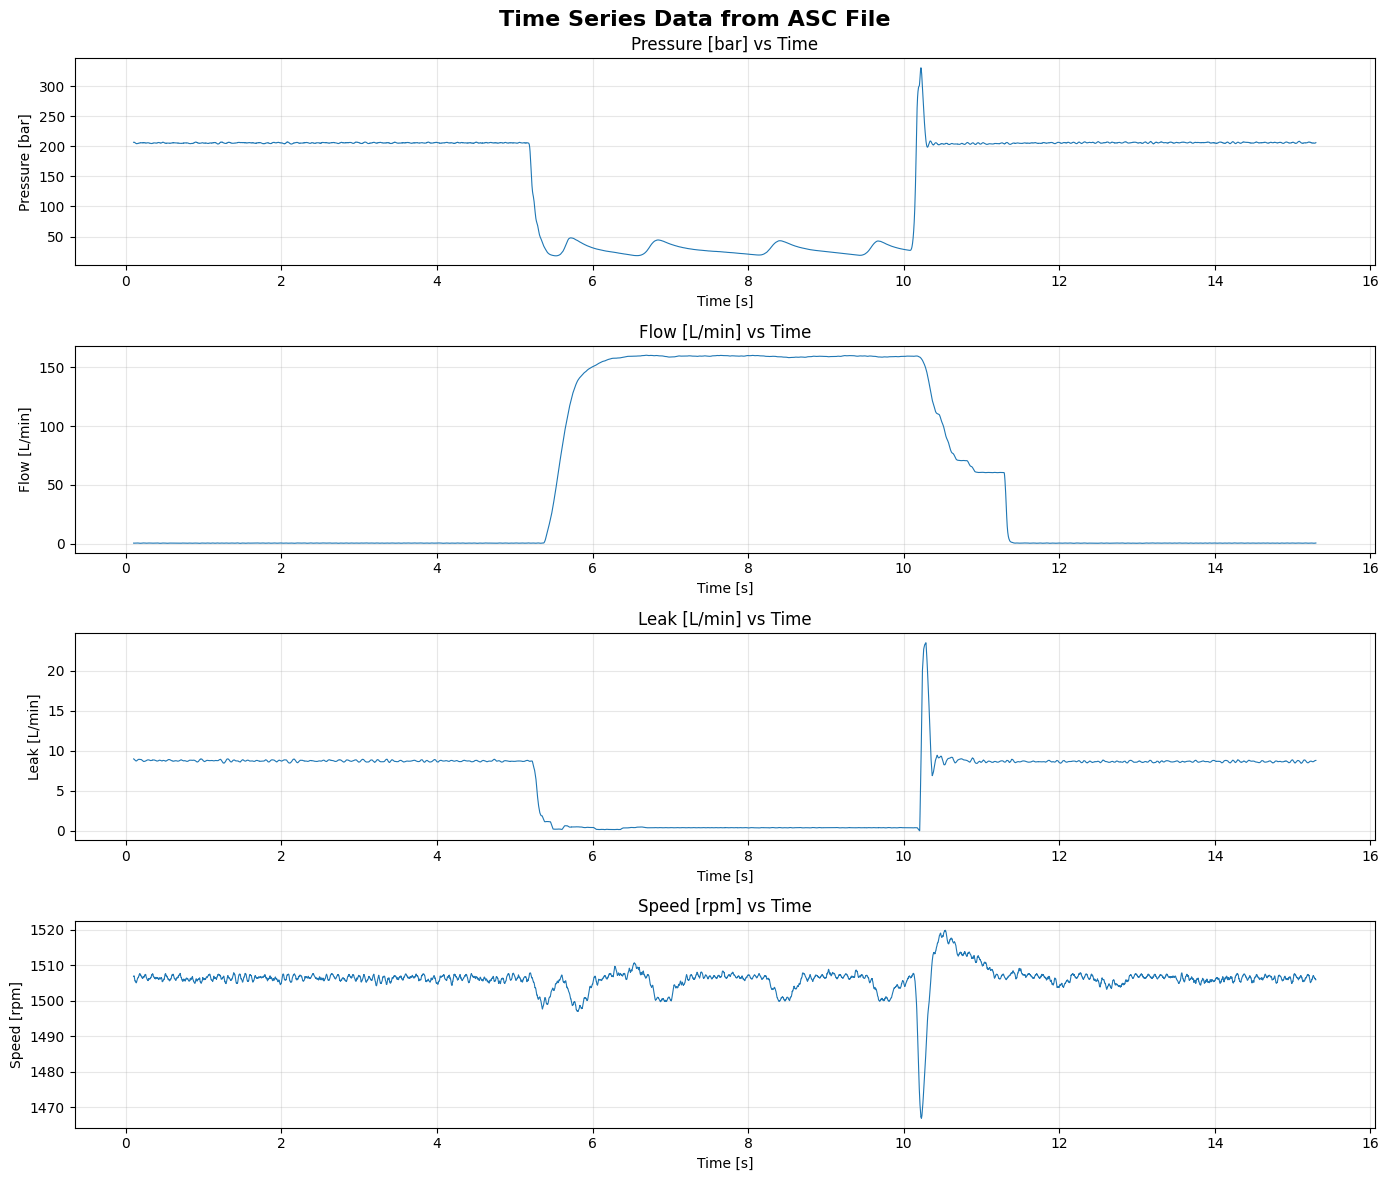

In [7]:
if 'data' in locals():
    # Get time array
    time_key = 'Messzeit[s]' if 'Messzeit[s]' in data else list(data.keys())[0]
    t = data[time_key]
    
    # Select channels to plot (exclude time)
    channel_names = [k for k in data.keys() if k != time_key]
    channels_to_plot = channel_names[:4]  # Plot first 4 channels
    
    if len(channels_to_plot) > 0:
        fig, axes = plt.subplots(len(channels_to_plot), 1, figsize=(14, 3 * len(channels_to_plot)))
        
        if len(channels_to_plot) == 1:
            axes = [axes]
        
        fig.suptitle('Time Series Data from ASC File', fontsize=16, fontweight='bold')
        
        for i, channel in enumerate(channels_to_plot):
            axes[i].plot(t, data[channel], linewidth=0.8)
            axes[i].set_xlabel('Time [s]')
            axes[i].set_ylabel(channel)
            axes[i].set_title(f'{channel} vs Time')
            axes[i].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No channels available for plotting")

## 5. Test Data Sampling Rate

In [8]:
if 'data' in locals() and time_key in data:
    from Normal_data_to_fft import estimate_sampling_rate
    
    sampling_rate = estimate_sampling_rate(data[time_key])
    
    print(f"\nEstimated Sampling Rate: {sampling_rate:.2f} Hz")
    print(f"Sampling Period: {1/sampling_rate:.6f} seconds")

STEP 3: ESTIMATING SAMPLING RATE
Time array length: 22800
Time range: [0.1000, 15.2993] s
Duration: 15.1993 s
Average sampling interval: 0.000667 s
Estimated sampling rate: 1500.00 Hz
Sampling interval std: 0.000000 s


Estimated Sampling Rate: 1500.00 Hz
Sampling Period: 0.000667 seconds


## 6. Summary

Run this cell to see a summary of the loaded data.

In [9]:
if 'df' in locals() and 'data' in locals():
    print("\n" + "=" * 70)
    print("DATA LOADING TEST SUMMARY")
    print("=" * 70)
    print(f"✓ Successfully loaded ASC file")
    print(f"✓ Total samples: {df.shape[0]}")
    print(f"✓ Total columns: {df.shape[1]}")
    print(f"✓ Extracted channels: {len(data)}")
    print(f"✓ Sampling rate: {sampling_rate:.2f} Hz")
    print(f"✓ Duration: {t[-1] - t[0]:.2f} seconds")
    print("=" * 70)
else:
    print("Please run the previous cells to load data first.")


DATA LOADING TEST SUMMARY
✓ Successfully loaded ASC file
✓ Total samples: 22800
✓ Total columns: 11
✓ Extracted channels: 10
✓ Sampling rate: 1500.00 Hz
✓ Duration: 15.20 seconds
